In [1]:
#Import Tools
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import string
import re

In [2]:
# set the years
years_list = ['2014','2015','2016','2017','2018','2019', '2020']

## Scrape Combine Data/Draft Position

In [3]:
def scrape_combine(years_list):
    class_list = []
    for year in years_list:
        url = f'https://www.pro-football-reference.com/draft/{year}-combine.htm#combine'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]

        #drop columns with many NAs
        #athleticism_stats = df[['Player','Pos', 'Ht','Wt','40yd', 'Vertical', 'Bench','Broad Jump', '3Cone', 'Shuttle','Unnamed: 0']]
        #df = df.drop(df[['College','40yd','Vertical', 'Bench', 'Broad Jump', '3Cone','Shuttle','Unnamed: 0']], axis = 1)

        #drop rows with headers
        df = df[df["Player"] != "Player"]

        #Rename Drafted NaN values to Undrafted
        df['Drafted (tm/rnd/yr)'] = df['Drafted (tm/rnd/yr)'].fillna('Undrafted / 8th / 251st pick / 2018')
        
        class_list.append(df)
        
    if len(years_list)>1:   
        df = pd.concat(class_list, axis = 0)
        
        #drop NAs now from draft class
        #draft_class18 = draft_class18.dropna()
        
        df = df.drop(df[['College']], axis = 1)
        
    return df

In [4]:
# Import CSV training data
draft_classes = scrape_combine(years_list)
draft_classes.head(51)

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Jared Abbrederis,WR,Wisconsin,6-1,195,4.50,30.5,4,117,6.80,4.08,Green Bay Packers / 5th / 176th pick / 2014
1,Davante Adams,WR,Fresno State,6-1,212,4.56,39.5,14,123,6.82,4.30,Green Bay Packers / 2nd / 53rd pick / 2014
2,Mo Alexander,S,Utah State,6-1,220,4.50,38.0,NaN,123,7.05,4.51,St. Louis Rams / 4th / 110th pick / 2014
3,Ricardo Allen,CB,Purdue,5-9,187,4.61,35.5,13,117,NaN,4.15,Atlanta Falcons / 5th / 147th pick / 2014
4,Jace Amaro,TE,Texas Tech,6-5,265,4.74,33.0,28,118,7.42,4.30,New York Jets / 2nd / 49th pick / 2014
5,Antonio Andrews,RB,Western Kentucky,5-10,225,4.82,29.5,20,106,7.24,4.49,Undrafted / 8th / 251st pick / 2018
6,Dri Archer,WR,Kent State,5-8,173,4.26,38.0,20,122,6.86,4.06,Pittsburgh Steelers / 3rd / 97th pick / 2014
7,Matt Armstrong,C,Grand Valley State,6-2,302,5.18,NaN,NaN,NaN,NaN,NaN,Undrafted / 8th / 251st pick / 2018
8,George Atkinson,RB,Notre Dame,6-1,218,4.48,38.0,19,121,7.07,4.46,Undrafted / 8th / 251st pick / 2018
9,Jeremiah Attaochu,OLB,Georgia Tech,6-3,252,NaN,NaN,NaN,NaN,NaN,NaN,San Diego Chargers / 2nd / 50th pick / 2014


In [5]:
def clean_combine_stats(df):
    # Split the Height into feet and inches, then convert to numeric, 
    # and calculate BMI
    ft_ = df['Ht'].apply(lambda x: x.split('-')[0])
    in_ = df['Ht'].apply(lambda x: x.split('-')[-1])
    ft_ = pd.to_numeric(ft_)
    in_ = pd.to_numeric(in_)
    wt_ = pd.to_numeric(df['Wt'])
    # wt_ = draft_class18['Wt']
    inches_ = (12*ft_) + in_
    m = inches_ * 0.0254
    m2 = m**2
    kg = wt_ * 0.453592
    df['Ht'] = inches_
    df['BMI'] = kg/m2

    
    # Isolate just their draft pick
    df['Draft Pick']= df['Drafted (tm/rnd/yr)'].apply(lambda x: x.split('/')[2])
    # Extract only the numeric part
    df['Draft Pick'] = df['Draft Pick'].str.extract(r'(\d+)').astype(int)


    # Isolate just their draft round
    df['Draft Round']= df['Drafted (tm/rnd/yr)'].apply(lambda x: x.split('/')[1])
    df['Draft Round'] = df['Draft Round'].str[1]
    
    # Isolate just their draft year
    df['Draft Year']= df['Drafted (tm/rnd/yr)'].apply(lambda x: x.split('/')[3])
    #df['Draft Year'] = df['Draft Year'].str[1]

    # drop drafted column
    df = df.drop(df[['Drafted (tm/rnd/yr)']], axis = 1)
    
    return df

In [6]:
combine_stats = clean_combine_stats(draft_classes)
combine_stats.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,BMI,Draft Pick,Draft Round,Draft Year
0,Jared Abbrederis,WR,Wisconsin,73,195,4.50,30.5,4,117,6.80,4.08,25.726864,176,5,2014
1,Davante Adams,WR,Fresno State,73,212,4.56,39.5,14,123,6.82,4.30,27.969718,53,2,2014
2,Mo Alexander,S,Utah State,73,220,4.50,38.0,NaN,123,7.05,4.51,29.025179,110,4,2014
3,Ricardo Allen,CB,Purdue,69,187,4.61,35.5,13,117,NaN,4.15,27.614767,147,5,2014
4,Jace Amaro,TE,Texas Tech,77,265,4.74,33.0,28,118,7.42,4.30,31.424066,49,2,2014


In [7]:
# isolate just wide receivers for now
combine_stats = combine_stats[combine_stats['Pos']== 'WR']
combine_stats.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,BMI,Draft Pick,Draft Round,Draft Year
0,Jared Abbrederis,WR,Wisconsin,73,195,4.50,30.5,4,117,6.80,4.08,25.726864,176,5,2014
1,Davante Adams,WR,Fresno State,73,212,4.56,39.5,14,123,6.82,4.30,27.969718,53,2,2014
6,Dri Archer,WR,Kent State,68,173,4.26,38.0,20,122,6.86,4.06,26.304269,97,3,2014
14,Kelvin Benjamin,WR,Florida State,77,240,4.61,32.5,13,119,7.33,4.39,28.459531,28,1,2014
27,Chris Boyd,WR,Vanderbilt,76,206,4.73,NaN,12,NaN,NaN,NaN,25.074830,251,8,2018


In [8]:
# mean impute combine stats
#combine_stats = combine_stats.fillna(combine_stats.mean())
columns = ['Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle','BMI']
for column in columns:
    combine_stats[column] = pd.to_numeric(combine_stats[column])
    combine_stats[column] = combine_stats[column].fillna(combine_stats[column].mean())
    combine_stats[column] = round(combine_stats[column],2)
#combine_stats = combine_stats.dropna()

In [9]:
combine_stats.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,BMI,Draft Pick,Draft Round,Draft Year
0,Jared Abbrederis,WR,Wisconsin,73,195,4.50,30.50,4.0,117.0,6.80,4.08,25.73,176,5,2014
1,Davante Adams,WR,Fresno State,73,212,4.56,39.50,14.0,123.0,6.82,4.30,27.97,53,2,2014
6,Dri Archer,WR,Kent State,68,173,4.26,38.00,20.0,122.0,6.86,4.06,26.30,97,3,2014
14,Kelvin Benjamin,WR,Florida State,77,240,4.61,32.50,13.0,119.0,7.33,4.39,28.46,28,1,2014
27,Chris Boyd,WR,Vanderbilt,76,206,4.73,35.24,12.0,121.7,6.99,4.25,25.07,251,8,2018


In [10]:
combine_stats.columns

Index(['Player', 'Pos', 'School', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'BMI', 'Draft Pick', 'Draft Round',
       'Draft Year'],
      dtype='object')

In [11]:
# Create the 'Player_ID' column by removing punctuation and spaces
df = combine_stats
df['Player_ID'] = df['Player'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).replace(' ', '').lower())
combine_stats = df

## Scrape Second Contract Data

In [12]:
# Import CSV training data, start with WR
url = 'https://overthecap.com/contract-history/wide-receiver'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]

In [13]:
# take most important columns
df = df[['Player','Year Signed','APY as % Of Cap At Signing']]

In [14]:
# Sort the DataFrame by col1 and col2
df = df.sort_values(by=['Player', 'Year Signed'])

# Create a rank within each group of col1 based on col2
df['rank'] = df.groupby('Player')['Year Signed'].rank(method='first')

# Filter to keep only rows with rank == 2 (2nd lowest)
df = df[df['rank'] == 2]

# Drop the helper 'rank' column (optional)
df = df.drop(columns=['rank'])

# Reset the index
df = df.reset_index(drop=True)

# convert APY as $ of Cap At Signing to decimal
df['APY as % Of Cap At Signing'] = df['APY as % Of Cap At Signing'].replace('%', '', regex=True).astype(float) / 100

In [15]:
df['Player_ID'] = df['Player'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).replace(' ', '').lower())
second_contracts = df
df.head()

,Player,Year Signed,APY as % Of Cap At Signing,Player_ID
0,A.J. Brown,2022,0.120,ajbrown
1,A.J. Green,2015,0.105,ajgreen
2,A.J. Jenkins,2012,0.014,ajjenkins
3,A.J. Richardson,2019,0.001,ajrichardson
4,A.T. Perry,2024,0.001,atperry


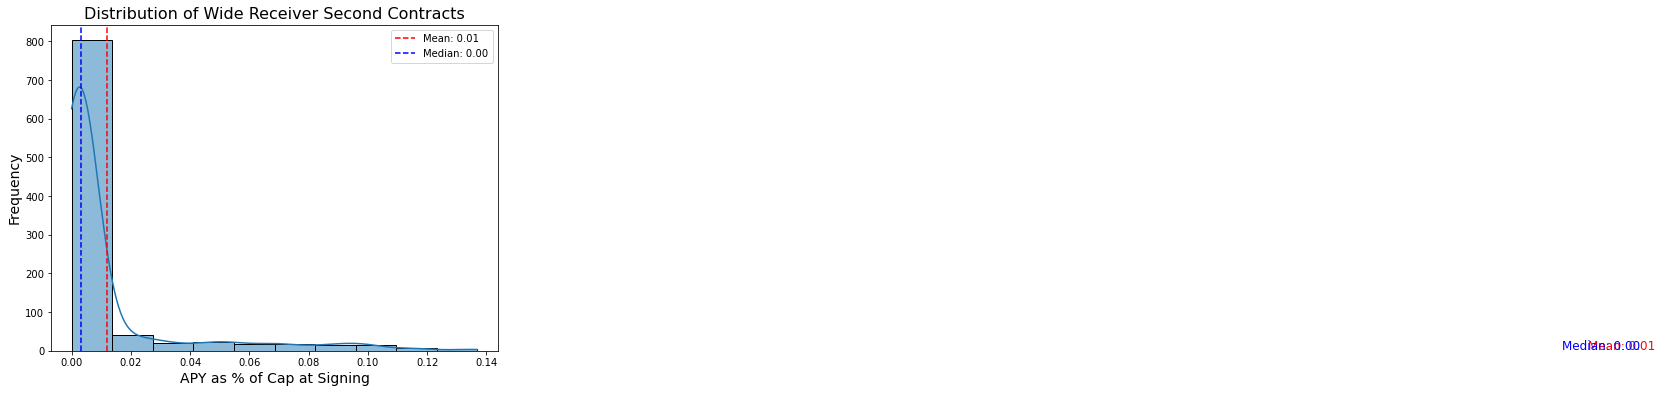

In [16]:
# Calculate the mean and median of the column
mean_value = df['APY as % Of Cap At Signing'].mean()
median_value = df['APY as % Of Cap At Signing'].median()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a histogram with Seaborn
sns.histplot(df['APY as % Of Cap At Signing'], kde=True, bins=10)

# Add a vertical line for the mean value
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Add a vertical line for the median value
plt.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.2f}')

# Add the labels for the mean and median
plt.text(mean_value + 0.5, 3, f'Mean: {mean_value:.2f}', color='red', fontsize=12)
plt.text(median_value + 0.5, 3, f'Median: {median_value:.2f}', color='blue', fontsize=12)

# Add title and labels
plt.title('Distribution of Wide Receiver Second Contracts', fontsize=16)
plt.xlabel('APY as % of Cap at Signing', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the legend
plt.legend()

# Show the plot
plt.show()

## Scrape Receiving Stats

Get Receiving Stats from best season

In [17]:
# Import CSV training data, start with WR
def scrape_receiving_stats(years_list):
    class_list = []
    for year in years_list:
        url = f'https://www.sports-reference.com/cfb/years/{year}-receiving.html'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        class_list.append(df)
        
    if len(years_list)>1:   
        df = pd.concat(class_list, axis = 0)
        
    # Set the column names to the second row (drop the first row of column headers)
    df.columns = df.columns.get_level_values(1)

    awards = df.Awards

    df = df.iloc[:, :-6]

    df['Awards'] = awards

    # Get the column positions of 'Yds'
    yds_columns = [i for i, col in enumerate(df.columns) if col == 'Yds']

    # Rename the 'Yds' columns
    df.columns.values[yds_columns[0]] = 'rec_yds'
    df.columns.values[yds_columns[1]] = 'rush_yds'

    # Get the column positions of 'Yds'
    td_columns = [i for i, col in enumerate(df.columns) if col == 'TD']

    # Rename the 'Yds' columns
    df.columns.values[td_columns[0]] = 'rec_TD'
    df.columns.values[td_columns[1]] = 'rush_TD'

    # Create the 'award_count' column
    df['award_count'] = df['Awards'].apply(lambda x: 0 if pd.isna(x) else len(x.split(',')))

    # Remove asterisks from the 'Player' column
    df['Player'] = df['Player'].str.replace('*', '', regex=False)
    
    # Step 1: Create the 'years_played' column
    df['years_played'] = df.groupby('Player')['Player'].transform('count')

    # Step 2: Sort the dataframe by 'Player' and 'rec_yds' to get the row with the highest 'rec_yds' for each player
    df_sorted = df.sort_values(by=['Player', 'rec_yds'], ascending=[True, False])

    # Step 3: Drop duplicates based on the 'Player' column, keeping the row with the highest 'rec_yds'
    df = df_sorted.drop_duplicates(subset='Player', keep='first')
    
    df['Y/A'] = df['Y/A'].fillna(0)
        
    return df

In [18]:
years_list
df = scrape_receiving_stats(years_list)
df.sort_values(by = 'Player').head()

,Rk,Player,Team,Conf,G,Rec,rec_yds,Y/R,rec_TD,Y/G,Att,rush_yds,Y/A,rush_TD,Awards,award_count,years_played
1504,1505.0,A'Darius Purifoy,Appalachian State,Sun Belt,5.0,2.0,25.0,12.5,0.0,5.0,0.0,0.0,0.0,0.0,NaN,0,2
1780,1781.0,A'Jon Vivens,Colorado State,MWC,4.0,1.0,1.0,1.0,0.0,0.3,49.0,210.0,4.3,1.0,NaN,0,1
740,741.0,A.D. Miller,Oklahoma,Big 12,12.0,12.0,145.0,12.1,2.0,12.1,0.0,0.0,0.0,0.0,NaN,0,4
1513,1514.0,A.J. Abbott,Wisconsin,Big Ten,4.0,2.0,12.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,0,1
1421,1422.0,A.J. Alexander,Ohio State,Big Ten,13.0,4.0,27.0,6.8,0.0,2.1,0.0,0.0,0.0,0.0,NaN,0,1


In [19]:
# Create the 'Player_ID' column by removing punctuation and spaces
df['Player_ID'] = df['Player'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).replace(' ', '').lower())
college_stats = df

## Join College Stats with Combine Stats and Second Contracts

In [20]:
len(combine_stats)

340

In [21]:
combine_stats[combine_stats['Player_ID']== 'ajbrown']

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,BMI,Draft Pick,Draft Round,Draft Year,Player_ID
40,A.J. Brown,WR,Mississippi,72,226,4.49,36.5,19.0,120.0,6.99,4.25,30.65,51,2,2019,ajbrown


In [22]:
len(college_stats)

6771

In [23]:
college_stats[college_stats['Player_ID']== 'ajbrown']

,Rk,Player,Team,Conf,G,Rec,rec_yds,Y/R,rec_TD,Y/G,Att,rush_yds,Y/A,rush_TD,Awards,award_count,years_played,Player_ID
6,7.0,A.J. Brown,Ole Miss,SEC,12.0,85.0,1320.0,15.5,6.0,110.0,0.0,0.0,0.0,0.0,NaN,0,3,ajbrown


In [24]:
# Perform the left joins
df_merged = combine_stats.merge(college_stats, on='Player_ID', how='inner')

In [25]:
len(df_merged)

265

In [26]:
df_merged[df_merged['Player_ID']== 'ajbrown']

,Player_x,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,...,Y/R,rec_TD,Y/G,Att,rush_yds,Y/A,rush_TD,Awards,award_count,years_played
178,A.J. Brown,WR,Mississippi,72,226,4.49,36.5,19.0,120.0,6.99,...,15.5,6.0,110.0,0.0,0.0,0.0,0.0,NaN,0,3


In [27]:
df_merged = df_merged.merge(second_contracts, on='Player_ID', how='inner')
df_merged[['Year Signed','APY as % Of Cap At Signing']] = df_merged[['Year Signed','APY as % Of Cap At Signing']].fillna(0)

In [28]:
len(df_merged)

217

In [29]:
# create additional variables

# Create the 'ideal_ht' column: 1 if Ht > 71 and < 75
df_merged['ideal_ht'] = np.where((df_merged['Ht'] > 71) & (df_merged['Ht'] < 75), 1, 0)

# Create the 'ideal_wt' column: 1 if Ht > 190 and < 216
df_merged['ideal_wt'] = np.where((df_merged['Wt'] > 185) & (df_merged['Wt'] < 216), 1, 0)

# Create the 'ideal_bmi' column: 1 if BMI > 25 and < 31
df_merged['ideal_bmi'] = np.where((df_merged['BMI'] > 25) & (df_merged['BMI'] < 31), 1, 0)

# Create the 'ideal_40' column: 1 if 40yd > 4.29 and < 4.6
df_merged['ideal_40'] = np.where((df_merged['40yd'] > 4.29) & (df_merged['40yd'] < 4.6), 1, 0)

# Create the 'ideal_shuttle' column: 1 if Shuttle < 4.3
df_merged['ideal_shuttle'] = np.where((df_merged['Shuttle'] < 4.55), 1, 0)

# Create 'ideal_all' if all ideal categories are met
df_merged['ideal_all'] = ((df_merged['ideal_ht'] == 1) & 
                   (df_merged['ideal_bmi'] == 1) & 
                   (df_merged['ideal_40'] == 1) & 
                   (df_merged['ideal_shuttle'] == 1)).astype(int)

#Create 'elite_production' column
df_merged['elite_prod'] = np.where((df_merged['rec_yds'] >= 1100 | (df_merged['rec_TD'] >= 10) | (df_merged['Rec'] >= 80)), 1, 0)

#Create 'td/rec'
df_merged['td/rec'] =np.where(df_merged['rec_TD'] > 0, df_merged['Rec'] / df_merged['rec_TD'], 0)

#Create 'rec/g'
df_merged['rec/g'] =np.where(df_merged['Rec'] > 0, df_merged['Rec'] / df_merged['G'], 0)

#bmi/shuttle
df_merged['bmi/shuttle'] = df_merged['BMI'] / df_merged['Shuttle']

#bmi/bench
df_merged['bmi/bench'] = df_merged['BMI'] / df_merged['Bench']

#bmi/40
df_merged['bmi/40'] = df_merged['BMI'] / df_merged['40yd']

#bmi/vertical
df_merged['bmi/vertical'] = df_merged['BMI'] / df_merged['Vertical']

# Create the 'H_win' column if won the heisman
# If the number is 1, set 'H_win' to 1
df_merged['Awards'] = df_merged['Awards'].fillna('None')
df_merged['H_win'] = df_merged['Awards'].apply(lambda x: 1 if re.search(r'H-(\d+)', x) and int(re.search(r'H-(\d+)', x).group(1)) == 1 else 0)

# Create dummy variables for the 'School' column
df_schools = pd.get_dummies(df_merged['Conf'], prefix='Conf')

# Combine the original dataframe with the new dummy columns
df_merged = pd.concat([df_merged, df_schools], axis=1)

## Multiple Linear Regression

In [30]:
df_merged2 = df_merged[['Player','Player_ID','Ht','Wt','40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'BMI', 'Draft Pick',
       'Draft Year', 'G', 'Rec', 'rec_yds', 'Y/R',
       'rec_TD', 'Y/G',
       'APY as % Of Cap At Signing']]

In [31]:
# Define the independent variables (X) and the dependent variable (Y)
ind_vars = ['Vertical','Ht','Broad Jump', '3Cone', 'Shuttle', '40yd','BMI',
            'Draft Round', 'Draft Year',
            'rec_yds','Rec','G','years_played', 'rec_TD', 
            'bmi/40', 'bmi/shuttle','bmi/vertical',
            
            #dummy vars
            'elite_prod',
            'ideal_ht','ideal_bmi', 'ideal_40','ideal_shuttle']

X = df_merged[ind_vars] # Independent variables
y = df_merged['APY as % Of Cap At Signing']  # Dependent variable

# Split data into training and test sets (optional, for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the model coefficients (weights)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions
y_pred = model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)

Intercept: -11.270989333507563
Coefficients: [-1.23709237e-03  1.51832243e-04 -6.85285661e-04  1.20626329e-02
  1.17671854e+00  2.29897419e-01 -2.23698621e-01 -6.81372796e-03
  2.63979482e-03 -2.54456648e-06  2.35607605e-05 -2.15952461e-03
 -4.42136420e-04 -3.14209522e-04  5.27355937e-16 -6.24458994e-04
  2.15514991e-03  1.26031435e-03  4.12836631e-02  1.74866884e-01
  7.92240817e-01 -8.55537485e-02]
Predictions: [ 0.04981377  0.01524187 -0.02418471  0.0057587   0.0024548   0.0244842
  0.0010654  -0.01477632  0.01862482  0.00296329 -0.00678482 -0.0075381
  0.03507433  0.01835394 -0.00208034  0.00212435  0.00933562  0.02321246
  0.00839941  0.00737233 -0.0028359   0.03881661 -0.00677946  0.0240311
  0.00685239 -0.00642458  0.00864272 -0.00026311 -0.00942799 -0.0106722
  0.02601012 -0.00132613 -0.00819815  0.0124161  -0.00350253  0.00185358
  0.0099876   0.01351468  0.03405757  0.02869693  0.04357936  0.03938638
 -0.00223599  0.00076048]


In [32]:
# Calculate accuracy metrics

# R-squared
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.1706411345687513
Mean Absolute Error (MAE): 0.017638390913048505
Mean Squared Error (MSE): 0.0006321702274180951
Root Mean Squared Error (RMSE): 0.025142995593566315


In [33]:
# Get feature importance based on coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Sort the coefficients by the absolute value to find the most important features
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 5 most important features
top_5_features = coefficients_sorted.head(5)
print("\nTop 5 Most Important Features:")
print(top_5_features)


Top 5 Most Important Features:
             Coefficient  Abs_Coefficient
Shuttle         1.176719         1.176719
bmi/shuttle     0.792241         0.792241
40yd            0.229897         0.229897
BMI            -0.223699         0.223699
bmi/40          0.174867         0.174867


## Predict APY % for 10 Receivers that got large contracts

In [34]:
preds = model.predict(df_merged[X.columns])

In [35]:
df_merged2['Predicted APY as % of Cap'] = preds

In [36]:
# Sort by actual
df_merged2.sort_values(by = 'APY as % Of Cap At Signing', ascending = False).reset_index().head(10)

,index,Player,Player_ID,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,...,Draft Pick,Draft Year,G,Rec,rec_yds,Y/R,rec_TD,Y/G,APY as % Of Cap At Signing,Predicted APY as % of Cap
0,195,Justin Jefferson,justinjefferson,73,202,4.43,37.5,14.02,126.0,6.99,...,22,2020,15.0,111.0,1540.0,13.9,18.0,102.7,0.137,0.037997
1,202,CeeDee Lamb,ceedeelamb,74,198,4.50,34.5,11.00,124.0,6.99,...,17,2020,13.0,62.0,1327.0,21.4,14.0,102.1,0.133,0.043312
2,142,A.J. Brown,ajbrown,72,226,4.49,36.5,19.00,120.0,6.99,...,51,2019,12.0,85.0,1320.0,15.5,6.0,110.0,0.120,0.038817
3,174,Brandon Aiyuk,brandonaiyuk,72,205,4.50,40.0,11.00,128.0,6.99,...,25,2020,12.0,65.0,1192.0,18.3,8.0,99.3,0.117,0.045679
4,168,Deebo Samuel,deebosamuel,71,214,4.48,39.0,15.00,122.0,7.03,...,36,2019,12.0,62.0,882.0,14.2,11.0,73.5,0.115,0.057604
5,164,D.K. Metcalf,dkmetcalf,75,228,4.33,40.5,27.00,134.0,7.38,...,64,2019,12.0,39.0,646.0,16.6,7.0,53.8,0.115,0.041713
6,163,Terry McLaurin,terrymclaurin,72,208,4.35,37.5,18.00,125.0,7.01,...,76,2019,14.0,35.0,701.0,20.0,11.0,50.1,0.111,0.037743
7,60,Michael Thomas,michaelthomas,75,212,4.57,35.0,18.00,126.0,6.80,...,47,2016,13.0,71.0,1391.0,19.6,14.0,107.0,0.102,0.024642
8,8,Amari Cooper,amaricooper,73,211,4.42,33.0,14.02,120.0,6.71,...,4,2015,14.0,124.0,1727.0,13.9,16.0,123.4,0.101,0.059917
9,126,D.J. Moore,djmoore,72,210,4.42,39.5,15.00,132.0,6.95,...,24,2018,12.0,80.0,1033.0,12.9,8.0,86.1,0.099,0.061576


In [37]:
# Sort by predicted
df_merged2.sort_values(by = 'Predicted APY as % of Cap', ascending = False).reset_index().head(10)

,index,Player,Player_ID,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,...,Draft Pick,Draft Year,G,Rec,rec_yds,Y/R,rec_TD,Y/G,APY as % Of Cap At Signing,Predicted APY as % of Cap
0,198,Jerry Jeudy,jerryjeudy,73,193,4.45,35.0,14.02,120.0,6.99,...,15,2020,15.0,68.0,1315.0,19.3,14.0,87.7,0.069,0.077754
1,126,D.J. Moore,djmoore,72,210,4.42,39.5,15.00,132.0,6.95,...,24,2018,12.0,80.0,1033.0,12.9,8.0,86.1,0.099,0.061576
2,8,Amari Cooper,amaricooper,73,211,4.42,33.0,14.02,120.0,6.71,...,4,2015,14.0,124.0,1727.0,13.9,16.0,123.4,0.101,0.059917
3,168,Deebo Samuel,deebosamuel,71,214,4.48,39.0,15.00,122.0,7.03,...,36,2019,12.0,62.0,882.0,14.2,11.0,73.5,0.115,0.057604
4,130,Calvin Ridley,calvinridley,72,189,4.43,31.0,15.00,110.0,6.88,...,26,2018,15.0,89.0,1045.0,11.7,7.0,69.7,0.090,0.056773
5,145,Parris Campbell,parriscampbell,72,205,4.31,40.0,11.00,135.0,6.99,...,59,2019,14.0,90.0,1063.0,11.8,12.0,75.9,0.021,0.054291
6,0,Mike Evans,mikeevans,77,231,4.53,37.0,12.00,121.7,7.08,...,7,2014,6.0,5.0,75.0,15.0,1.0,12.5,0.093,0.052479
7,76,Chris Godwin,chrisgodwin,73,209,4.42,36.0,19.00,126.0,7.01,...,84,2017,13.0,69.0,1101.0,16.0,5.0,84.7,0.088,0.051116
8,205,Denzel Mims,denzelmims,75,207,4.38,38.5,16.00,131.0,6.66,...,59,2020,12.0,61.0,1087.0,17.8,8.0,90.6,0.001,0.049814
9,21,DeVante Parker,devanteparker,75,209,4.45,36.5,17.00,125.0,6.99,...,14,2015,7.0,43.0,855.0,19.9,5.0,122.1,0.054,0.047975


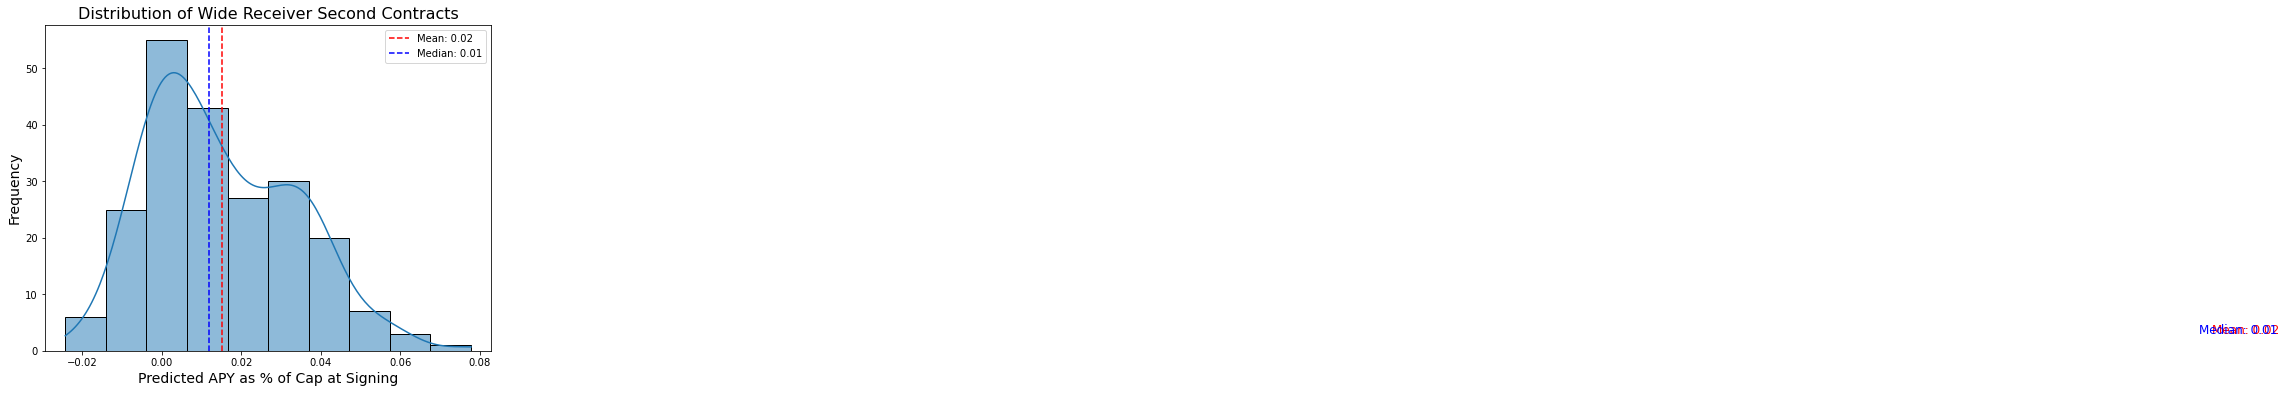

In [38]:
# Calculate the mean and median of the column
mean_value = df_merged2['Predicted APY as % of Cap'].mean()
median_value = df_merged2['Predicted APY as % of Cap'].median()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a histogram with Seaborn
sns.histplot(df_merged2['Predicted APY as % of Cap'], kde=True, bins=10)

# Add a vertical line for the mean value
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

# Add a vertical line for the median value
plt.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.2f}')

# Add the labels for the mean and median
plt.text(mean_value + 0.5, 3, f'Mean: {mean_value:.2f}', color='red', fontsize=12)
plt.text(median_value + 0.5, 3, f'Median: {median_value:.2f}', color='blue', fontsize=12)

# Add title and labels
plt.title('Distribution of Wide Receiver Second Contracts', fontsize=16)
plt.xlabel('Predicted APY as % of Cap at Signing', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the legend
plt.legend()

# Show the plot
plt.show()

## Next Step: Try to account for the fact that receivers are overpaid

additional helpful data, arm length, yards per route run, age, maybe add scouting report sentement analysis